In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


In [69]:
df=pd.read_csv("CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<AxesSubplot:>

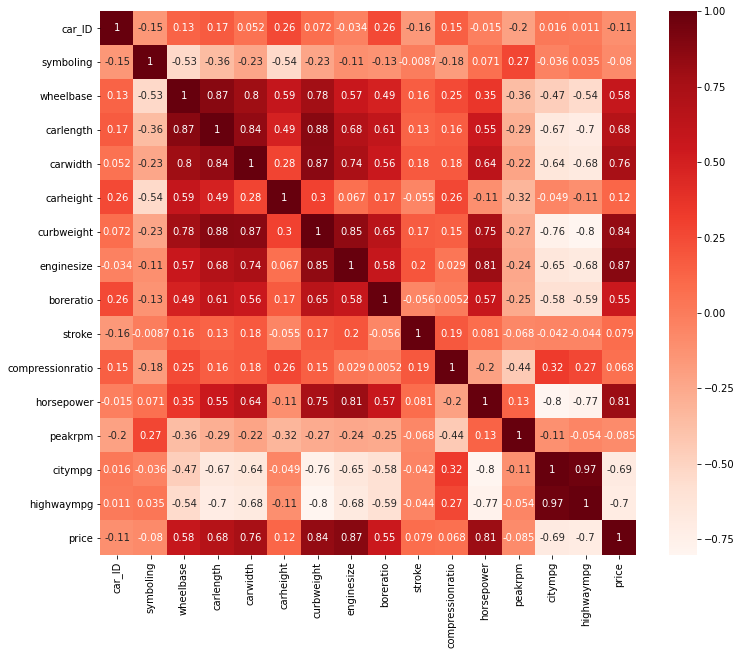

In [18]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [33]:
# choosing highly correlated features
target_var=abs(cor["price"])
imp_features=target_var[target_var>=0.5]
imp_features

wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
boreratio     0.553173
horsepower    0.808139
citympg       0.685751
highwaympg    0.697599
price         1.000000
Name: price, dtype: float64

In [43]:
dff=df[["curbweight","horsepower","price"]].dropna()
dff.head()

,curbweight,horsepower,price
0,2548,111,13495.0
1,2548,111,16500.0
2,2823,154,16500.0
3,2337,102,13950.0
4,2824,115,17450.0


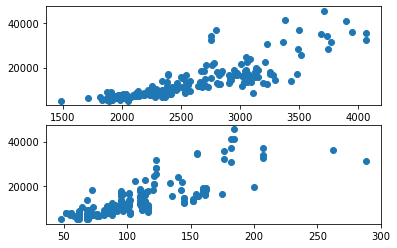

In [41]:
fig, axs = plt.subplots(2)
axs[0].scatter(dff["curbweight"],dff["price"])
axs[1].scatter(dff["horsepower"],dff["price"])

In [45]:
x=np.array(dff.drop(columns=["price"]))
y=np.array(dff["price"])

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [52]:
reg=LinearRegression().fit(xtrain,ytrain)
reg.score(xtest,ytest)

0.7540131515487642

In [67]:
polyfit=make_pipeline(PolynomialFeatures(9),LinearRegression())
polyfit.fit(xtrain,ytrain)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

In [68]:
polyfit.score(xtest,ytest)

0.8978910290500585